# Crops Production data from all over the world

The following dataset is collected from http://www.fao.org/faostat/en/#data/QC 

The data explains the following terms
1. Area: Country
2. Item: specific crop
3. Unit: quantity
 1. Area harvested (ha)
 2. Production (tonnes)
 3. Yield (hg/ha)
4. year: from 1961-2018

#Importing necessary libraries

In [79]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
#listing out the varioud files in the directory
import os
for entry in os.scandir('.'):
    if entry.is_file():
        print(entry.name)

data.csv
data.xlsx
Production_Crops_E_All_Data.csv
Production_Crops_E_All_Data_NOFLAG.csv
Production_Crops_E_Flags.csv
Untitled.ipynb


In [86]:
#importing the data
data = pd.read_csv('data.csv')

In [107]:
#informartion about data, data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51154 entries, 0 to 51153
Data columns (total 65 columns):
Area Code       51154 non-null int64
Area            51154 non-null object
Item Code       51154 non-null int64
Item            51154 non-null object
Element Code    51154 non-null int64
Element         51154 non-null object
Unit            51154 non-null object
1961            34520 non-null float64
1962            34550 non-null float64
1963            34548 non-null float64
1964            34575 non-null float64
1965            34566 non-null float64
1966            34720 non-null float64
1967            34750 non-null float64
1968            34837 non-null float64
1969            34869 non-null float64
1970            34980 non-null float64
1971            35057 non-null float64
1972            35101 non-null float64
1973            35113 non-null float64
1974            35178 non-null float64
1975            35346 non-null float64
1976            35428 non-null float64
1977

In [110]:
#first 5 rows of the data
data.head()

Area Code         Area  Item Code                              Item  \
0          2  Afghanistan        221               Almonds, with shell   
1          2  Afghanistan        221               Almonds, with shell   
2          2  Afghanistan        221               Almonds, with shell   
3          2  Afghanistan        711  Anise, badian, fennel, coriander   
4          2  Afghanistan        711  Anise, badian, fennel, coriander   

   Element Code         Element    Unit  1961  1962  1963  ...     2009  \
0          5312  Area harvested      ha   NaN   NaN   NaN  ...  11029.0   
1          5419           Yield   hg/ha   NaN   NaN   NaN  ...  39154.0   
2          5510      Production  tonnes   NaN   NaN   NaN  ...  43183.0   
3          5312  Area harvested      ha   NaN   NaN   NaN  ...  17748.0   
4          5419           Yield   hg/ha   NaN   NaN   NaN  ...   6203.0   

      2010     2011     2012     2013     2014     2015     2016     2017  \
0  11210.0  13469.0  13490.0  14114.0  13703.0  14676.0  19481.0  19793.0   
1  49955.0  45000.0  45960.0  29910.0  19996.0  16521.0  16859.0  13788.0   
2  56000.0  60611.0  62000.0  42215.0  27400.0  24246.0  32843.0  27291.0   
3  17000.0  19500.0  18500.0  18500.0  30000.0  25000.0  25638.0  27582.0   
4   6000.0   6414.0   6757.0   6757.0   7167.0   7200.0   7037.0   6954.0   

      2018  
0  20053.0  
1  17161.0  
2  34413.0  
3  25785.0  
4   7036.0  

[5 rows x 65 columns]

In [113]:
#obtaining the number of null values for each column
null_values = data.isna().sum()
null_values

Area Code           0
Area                0
Item Code           0
Item                0
Element Code        0
Element             0
Unit                0
1961            16634
1962            16604
1963            16606
1964            16579
1965            16588
1966            16434
1967            16404
1968            16317
1969            16285
1970            16174
1971            16097
1972            16053
1973            16041
1974            15976
1975            15808
1976            15726
1977            15532
1978            15483
1979            15315
1980            15011
1981            14897
1982            14776
1983            14692
                ...  
1989            12092
1990            10602
1991            10372
1992             6850
1993             6631
1994             6341
1995             6158
1996             6061
1997             5856
1998             5686
1999             5434
2000             5027
2001             4932
2002             4869
2003      

In [114]:
#percentage of null values for each variable
percentage_null_vales = (null_values/data.shape[0])*100
percentage_null_vales

Area Code        0.000000
Area             0.000000
Item Code        0.000000
Item             0.000000
Element Code     0.000000
Element          0.000000
Unit             0.000000
1961            32.517496
1962            32.458850
1963            32.462760
1964            32.409978
1965            32.427572
1966            32.126520
1967            32.067873
1968            31.897799
1969            31.835243
1970            31.618251
1971            31.467725
1972            31.381710
1973            31.358252
1974            31.231184
1975            30.902764
1976            30.742464
1977            30.363217
1978            30.267428
1979            29.939008
1980            29.344724
1981            29.121867
1982            28.885327
1983            28.721117
                  ...    
1989            23.638425
1990            20.725652
1991            20.276029
1992            13.390937
1993            12.962818
1994            12.395903
1995            12.038159
1996        

<BarContainer object of 65 artists>

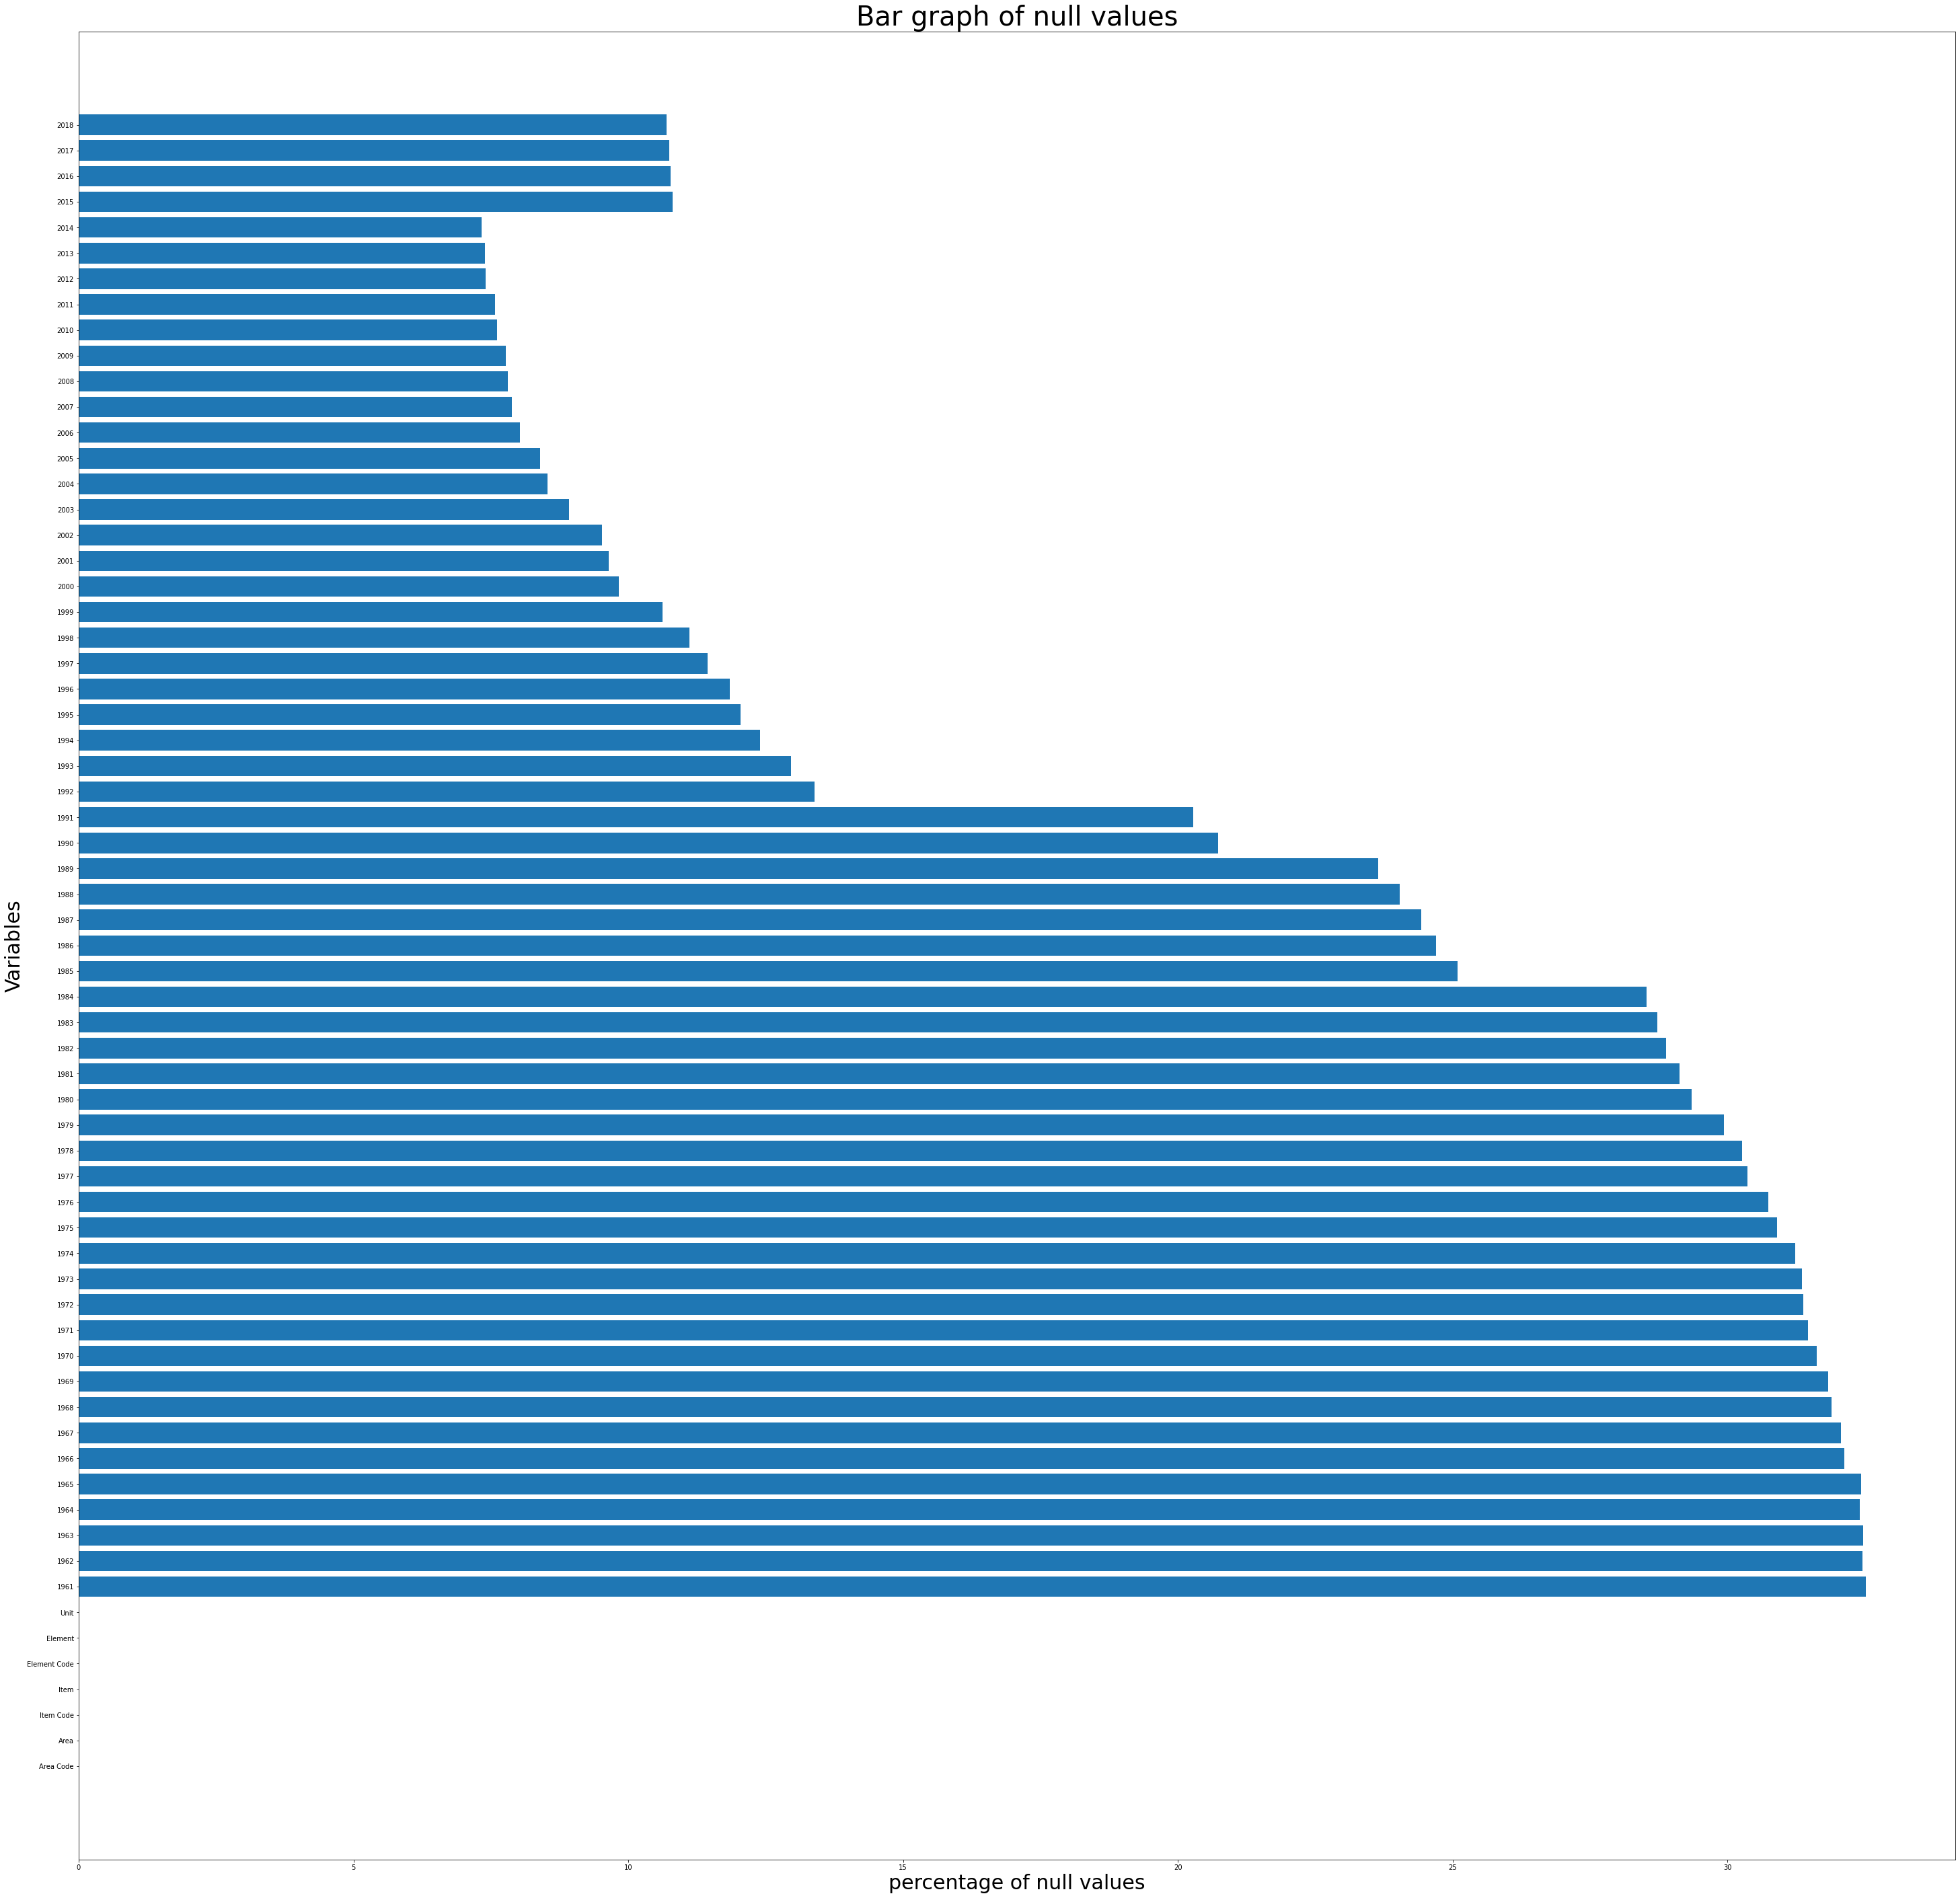

In [116]:
#exploratory graph for variavles vs percentage_null_vales
fig = plt.figure(1, figsize=(50,50))
plt.title("Bar graph of null values", fontsize=40)
plt.xlabel('percentage of null values', fontsize=30)
plt.ylabel('Variables', fontsize=30)
plt.barh(data.columns, percentage_null_vales)

From the above bar graph it is evedent that much of the years has null values of minimum 7.3% and maximum of 32.5%

For